### Background Information about the dataset used for this analysis
- This is dataset that describe Portugal bank marketing campaigns results.
- Conducted campaigns were based mostly on direct phone calls, offering bank's clients to place a term deposit.
- If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

### Pre-set Features Description

1. **age**: Age of the client (numeric)
2. **job**: Type of job (categorical)
    - 'admin.'
    - 'blue-collar'
    - 'entrepreneur'
    - 'housemaid'
    - 'management'
    - 'retired'
    - 'self-employed'
    - 'services'
    - 'student'
    - 'technician'
    - 'unemployed'
    - 'unknown'
3. **marital**: Marital status (categorical)
    - 'divorced' (includes widowed)
    - 'married'
    - 'single'
    - 'unknown'
4. **education**: Level of education (categorical)
    - 'basic.4y'
    - 'basic.6y'
    - 'basic.9y'
    - 'high.school'
    - 'illiterate'
    - 'professional.course'
    - 'university.degree'
    - 'unknown'
5. **default**: Has credit in default? (categorical)
    - 'no'
    - 'yes'
    - 'unknown'
6. **housing**: Has housing loan? (categorical)
    - 'no'
    - 'yes'
    - 'unknown'
7. **loan**: Has personal loan? (categorical)
    - 'no'
    - 'yes'
    - 'unknown'
8. **contact**: Contact communication type (categorical)
    - 'cellular'
    - 'telephone'
9. **month**: Last contact month of the year (categorical)
    - 'jan'
    - 'feb'
    - 'mar'
    - ...
    - 'nov'
    - 'dec'
10. **day_of_week**: Last contact day of the week (categorical)
    - 'mon'
    - 'tue'
    - 'wed'
    - 'thu'
    - 'fri'
11. **duration**: Last contact duration, in seconds (numeric)
12. **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: Number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: Outcome of the previous marketing campaign (categorical)
    - 'failure'
    - 'nonexistent'
    - 'success'
16. **emp.var.rate**: Employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: Consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: Consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: Euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: Number of employees - quarterly indicator (numeric)
21. **y**: Has the client subscribed a term deposit? (binary)
    - "yes"
    - "no"


### Importing Packages

In [ ]:
##basic file manipulation
import pandas as pd
import numpy as np

##Viz tools
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px

##Add-ons
import timeit
from datetime import datetime

##Feature Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

### Loading Data

In [ ]:
data = []
with open('/content/bank-additional-full.csv', 'r') as file:
   columns = file.readline().strip().replace('"', '').split(';')
   for line in file:
      values = line.strip().replace('"', '').split(';')
      record = {columns[i]: values[i] for i in range(len(columns))}
      data.append(record)

data = pd.DataFrame(data)

- In this code snippet above, I have parsing a CSV file named 'bank-additional-full.csv' containing bank marketing campaign data. - I remove quotes from column names and values to ensure consistency and cleanliness.
- constructed a DataFrame where each row corresponds to a record in the dataset.

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data_cc_int = ['age','duration','campaign','pdays','previous']
data_cc_float = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

### 1st level insights

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


1. **Age Distribution**: The mean age of clients in the dataset is approximately 40 years, with a standard deviation of around 10.42 years. The ages range from 17 to 98 years, with most clients falling between 32 and 47 years old.

2. **Call Duration**: The mean call duration is approximately 258 seconds -> about 4.3 minutes, with a wide range from 0 to 4918 seconds. However, the median duration (50th percentile) is 180 seconds, indicating a right-skewed distribution with some extremely long call durations.

3. **Campaign Contacts**: On average, clients were contacted about 2.57 times during the campaign, with a standard deviation of around 2.77. The number of campaign contacts ranges from 1 to 56, with the majority having been contacted fewer than 3 times.

4. **Pdays (Days Since Last Contact)**: The mean number of days since the last contact is approximately 962, with most values being 999, indicating that many clients were not previously contacted.

5. **Previous Contacts**: On average, clients had around 0.17 previous contacts, with most having no previous contacts.

6. **Economic Variables**: The employment variation rate (emp.var.rate) and the consumer price index (cons.price.idx) have relatively small standard deviations compared to their means, indicating less variability in these variables. Similarly, the consumer confidence index (cons.conf.idx) has a standard deviation of around 4.63.

7. **Euribor 3 Month Rate and Number of Employees**: The Euribor 3-month rate and the number of employees have relatively higher standard deviations compared to their means, indicating more variability.


### Handling the Missing Values - Unknown - Duplicates

In [ ]:
data.replace('unknown', np.nan , inplace=True)

In [ ]:
data.isna().any()

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [ ]:
print(f"Data Shape Before Dropping Null: {data.shape}")

Data Shape Before Dropping Null: (41188, 21)


In [ ]:
data.dropna(inplace = True)

In [ ]:
print(f"Data Shape Before Dropping Null: {data.shape}")

Data Shape Before Dropping Null: (30488, 21)


- These are the unknown values we don't have any assumptions on these.

In [ ]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
36951,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


- data.duplicated() will return bool values
- bool indexing is done to retrive the values from the dataframe
- There are 10 duplicate values

In [ ]:
data.drop_duplicates(inplace = True)

## Finding Insights from Data

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

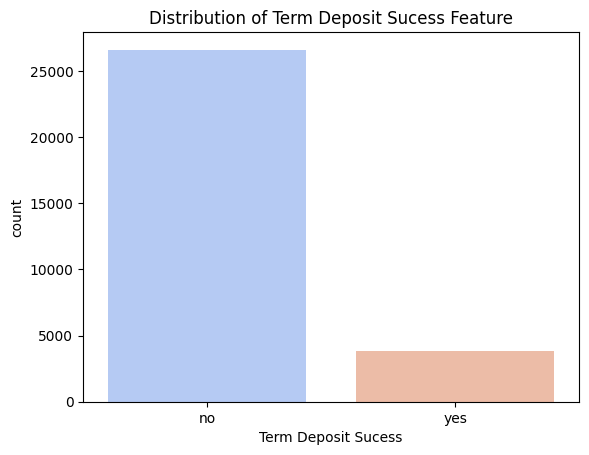

In [ ]:
sns.countplot(data = data, x= 'y',palette = 'coolwarm')
plt.title("Distribution of Term Deposit Sucess Feature")
plt.xlabel("Term Deposit Sucess")
plt.show()

- At first glance, it's evident that this dataset suffers from significant imbalance.
- Before proceeding with any modeling, it's crucial to address this imbalance by implementing oversampling techniques.

In [ ]:
## Adding a Feature Dummy for viz
data['count'] = 1

In [ ]:
## Looking for the Bank Distribution
job = data.groupby(["job","y"] , as_index=False).sum()

fig=px.bar(x=job["job"], y=job["count"], color=job["y"], barmode='group',
           title="Distribution of Jobs and Term Deposit",
           labels={"x":"Jobs titles","y":"Number of clients","color":"Term Deposit"})
fig.show()

- Jobs such as 'admin.', 'blue-collar', 'management', and 'technician' have a considerable number of clients, both subscribing and not subscribing to term deposits.
- On the other hand, jobs like 'student', 'unemployed', and 'entrepreneur' have fewer clients but still show some interest in term deposits.

In [ ]:
## Marital Status Description

mar = data.groupby(["marital","y"],as_index=False).sum()
fig=px.bar(x = mar["marital"],y = mar["count"],color = mar["y"],barmode='group',
           title="Distribution of Marital Status and Term Deposit",
           labels={"x":"marital status ","y":"Number of clients","color":"Term Deposit"})
fig.show()

- Among individuals who are divorced, a notable proportion haven't subscribed to term deposits.
- For married individuals, the count of those not subscribing to term deposits is significantly higher than those who have subscribed.
- Single individuals also exhibit a similar trend to the married group, with a higher count of those not subscribing to term deposits.But there's still a noteworthy portion of singles who have opted for term deposits, although the count is lower compared to those who haven't subscribed.

In [ ]:
## Education Description
education = data.groupby(["education","y"],as_index=False).sum()

fig=px.bar(x = education["education"],y = education["count"],color = education["y"]
           ,barmode = 'group',title="Distribution of Education and Term Deposit",
           labels={"x":"education ","y":"Number of clients","color":"Term Deposit"})
fig.show()

- Individuals with basic education levels (4 years, 6 years, and 9 years) -> show lower subscription rates to term deposits compared to those with higher education levels.
- High school graduates exhibit a moderate subscription rate to term deposits, with a considerable number opting for both yes and no responses.
- Individuals with professional courses or university degrees display higher subscription rates to term deposits compared to those with basic education levels high school diplomas and illiterate.
- This suggests that higher educational (university level) attainment might correlate with a greater likelihood of opting for term deposits.

- To support this I have plotted the funnel plot as well

In [ ]:
fig = px.funnel(education.sort_values(by="count",ascending=False), x='count', y='education',color="y")
fig.show()

In [ ]:
## Personal Loan

loan = data.groupby(["loan","y"],as_index=False).sum()
fig = px.bar(x=loan["loan"],y=loan["count"],color=loan["y"],barmode='group',
           title="Distribution of loan and Term deposit",
           labels={"x":"Has personal loan  ","y":"Number of clients","color":"Term Deposit"})
fig.show()

- **No Personal Loan**
  - About **87.2%** of clients with no personal loan have not subscribed to a term deposit.
  - Approximately **12.8%** of clients with no personal loan have subscribed to a term deposit.

- **Personal Loan**
  - This affects them by paying term deposit
  - Only few have opted.

This may not be valid as the data is highly imbalanced

In [ ]:
## Contact Types

contact = data.groupby(["contact","y"],as_index=False).sum()
fig=px.bar(x = contact["contact"],y = contact["count"],color=contact["y"],
           barmode='group',title="Distribution of contact and Term Deposit",
           labels={"x":"contact communication type for current compaign","y":"Number of clients","color":"Term Deposit"})
fig.show()

- Cellular contact seems to be more prevalent than telephone contact, as indicated by the higher counts for termn deposit conversion

In [ ]:
##Previous Outcome

poutcome = data.groupby(["poutcome","y"],as_index=False).sum()
fig=px.bar(x = poutcome["poutcome"],y = poutcome["count"],color = poutcome["y"],barmode = 'group',
           title="Distribution of Poutcome and deposit",
           labels={"x":"output from previous compaign","y":"Number of clients","color":"Term Deposit"})
fig.show()

- success outcomes they boast a relatively high success rate when it comes to subscriptions for term deposit.
- This indicates that successful outcomes from previous interactions have a positive influence on subscription conversion.
-  While "nonexistent" outcomes dominate, indicating a lack of previous interaction, there is potential for targeted outreach and follow-up strategies to convert these clients into subscribers.

In [ ]:
## Creating a KPI -> Conversion Rate
conversion_rates = data.groupby('poutcome')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

fig = px.bar(conversion_rates,title='Conversion Rate by Previous Outcome KPI')
fig.update_layout(xaxis={'categoryorder':'total descending'}, yaxis=dict(title='Conversion Rate'))
fig.show()

## Let's get visualize the Distribution

In [ ]:
age = data.groupby(["age","y"],as_index=False).sum()
fig=px.bar(x = age["age"],y = age["count"],color = age["y"],
           title="Distribution of Poutcome and deposit",
           labels={"x":" Age","y":"Number of clients","color":"Term Deposit"})
fig.show()

- Clients who have called by the bank have an extensive age range, from 18 to 89 years old.
- However, a majority of customers called is in the age of 30s and 40s.
- The distribution of customer age is fairly normal with a small standard deviation.
- Age 31 is the gold period age where most of them are converted for Term Deposits as compared to others

In [ ]:
## Month Distribution

month = data.groupby(["month","y"],as_index=False).sum()
fig=px.bar(x = month["month"],y = month["count"],color = month["y"],
           barmode='group',title="last contact month and deposit",
           labels={"x":" last contact month of the current campaign","y":"Number of clients","color":"Term Deposit"})
fig.show()

- We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July) , -> Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children.

In [ ]:
## Day Wise Distribution

day = data.groupby(["day_of_week","y"],as_index=False).sum()
fig = px.bar(x = day["day_of_week"],y = day["count"],color = day["y"],
           barmode = 'group',title = "last contact day and deposit",
           labels={"x":" last contact month of the current campaign","y":"Number of clients","color":"Term Deposit"})
fig.show()

KPI will provide insight into whether term deposits are more likely to be subscribed to at the start or end of the week based on conversion rates

In [ ]:
days_contacted = data.groupby(['day_of_week', 'y']).size().reset_index(name='count')

pivoted_days_contacted = days_contacted.pivot(index='day_of_week', columns='y', values='count').fillna(0)
pivoted_days_contacted['conversion_rate'] = pivoted_days_contacted['yes'] / (pivoted_days_contacted['yes'] + pivoted_days_contacted['no']) * 100

sorted_days_contacted = pivoted_days_contacted.sort_values(by='conversion_rate', ascending=False)

start_of_week_conversion_rate = sorted_days_contacted['conversion_rate'].iloc[0]
end_of_week_conversion_rate = sorted_days_contacted['conversion_rate'].iloc[-1]

if start_of_week_conversion_rate > end_of_week_conversion_rate:
    best_day_to_subscribe = sorted_days_contacted.index[0]
    kpi_result = f"The start of the week ({best_day_to_subscribe}) has a higher conversion rate for term deposits -> With {start_of_week_conversion_rate}."
else:
    worst_day_to_subscribe = sorted_days_contacted.index[-1]
    kpi_result = f"The end of the week ({worst_day_to_subscribe}) has a higher conversion rate for term deposits -> with {end_of_week_conversion_rate}."

print(kpi_result)

The start of the week (thu) has a higher conversion rate for term deposits -> With 13.738069159755906.


In [ ]:
## Emp Var Rate

day = data.groupby(["emp.var.rate","y"],as_index=False).sum()
fig = px.bar(x = day["emp.var.rate"],y = day["count"],color = day["y"],
           barmode = 'group',title = "Emp Var Rate [External] and Term Deposit",
           labels={"x":" emp var rate","y":"Number of clients","color":"Term Deposit"})
fig.show()

Surprisingly, one of the external variables, 'emp.var.rate' shows a trend where when it's negative, customers tend to say 'yes'

In [ ]:
fig = px.box(data, x = data["job"], y = data["duration"], color = data["y"],
             title="Duration of the call for each job")
fig.show()

- Comparing the average, the blue collar, entrepreneur have high duration in calls.
- students, retired have less duration in average.

In [ ]:
data.drop(columns = ['count']).corr(numeric_only = True).T

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.007968,-0.002338,-0.050911,0.049255,-0.050227,-0.035579,0.124661,-0.036361,-0.064420
duration,0.007968,1.000000,-0.068463,-0.046218,0.018732,-0.023367,0.012760,-0.009478,-0.028900,-0.040355
campaign,-0.002338,-0.068463,1.000000,0.054335,-0.080808,0.157756,0.127247,-0.011569,0.140862,0.148086
pdays,-0.050911,-0.046218,0.054335,1.000000,-0.590240,0.268836,0.068046,-0.102409,0.295246,0.370909
previous,0.049255,0.018732,-0.080808,-0.590240,1.000000,-0.403620,-0.176852,-0.027914,-0.438957,-0.488458
emp.var.rate,-0.050227,-0.023367,0.157756,0.268836,-0.403620,1.000000,0.765989,0.157848,0.969411,0.900367
cons.price.idx,-0.035579,0.012760,0.127247,0.068046,-0.176852,0.765989,1.000000,0.027420,0.667215,0.488746
cons.conf.idx,0.124661,-0.009478,-0.011569,-0.102409,-0.027914,0.157848,0.027420,1.000000,0.243844,0.075483
euribor3m,-0.036361,-0.028900,0.140862,0.295246,-0.438957,0.969411,0.667215,0.243844,1.000000,0.944863
nr.employed,-0.064420,-0.040355,0.148086,0.370909,-0.488458,0.900367,0.488746,0.075483,0.944863,1.000000


In [ ]:
correlation_matrix = data.drop(columns=['count']).corr(numeric_only = True)

threshold = 0.7
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

correlated_pairs = []
for i in range(len(highly_correlated.columns)):
    for j in range(i+1, len(highly_correlated.columns)):
        if highly_correlated.iloc[i, j]:
            correlated_pairs.append((highly_correlated.columns[i], highly_correlated.columns[j]))

for pair in correlated_pairs:
    print(pair)

('emp.var.rate', 'cons.price.idx')
('emp.var.rate', 'euribor3m')
('emp.var.rate', 'nr.employed')
('euribor3m', 'nr.employed')


- These are the features which are highly co-related which will create the problem of multi-colinearlity.

## Customer Segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

- Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others
- Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.
- Establish better customer relationships.
- Focus on the most profitable customers.

In [ ]:
## Getting Object Datatypes
data_obj_features_df = (data.dtypes == 'object')
object_cols = list(data_obj_features_df[data_obj_features_df].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [ ]:
data_kmeans = data.copy() ##Creating Copy to prevent any changes to own copy

In [ ]:
## Encoding the Categorical Data

LE = LabelEncoder()
for i in object_cols:
    data_kmeans[i] = data_kmeans[[i]].apply(LE.fit_transform)

In [ ]:
data_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  int64  
 2   marital         30478 non-null  int64  
 3   education       30478 non-null  int64  
 4   default         30478 non-null  int64  
 5   housing         30478 non-null  int64  
 6   loan            30478 non-null  int64  
 7   contact         30478 non-null  int64  
 8   month           30478 non-null  int64  
 9   day_of_week     30478 non-null  int64  
 10  duration        30478 non-null  int64  
 11  campaign        30478 non-null  int64  
 12  pdays           30478 non-null  int64  
 13  previous        30478 non-null  int64  
 14  poutcome        30478 non-null  int64  
 15  emp.var.rate    30478 non-null  float64
 16  cons.price.idx  30478 non-null  float64
 17  cons.conf.idx   30478 non-null  floa

#### Feature Scalling -> To reduce dynamic range

In [ ]:
scaler = StandardScaler()
scaler.fit(data_kmeans)
scaled_data = pd.DataFrame(scaler.transform(data_kmeans),columns= data_kmeans.columns )

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

- In this I will take 3 components for my further steps

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,30478.0,0.000000e+00,2.064378,-3.831225,-1.709674,-1.272106,1.903672,6.852377
col2,30478.0,7.460256e-17,1.355713,-2.867316,-0.716109,-0.119978,0.517794,7.529669
col3,30478.0,7.460256e-18,1.227410,-3.755974,-0.890374,0.016640,0.841055,5.422499


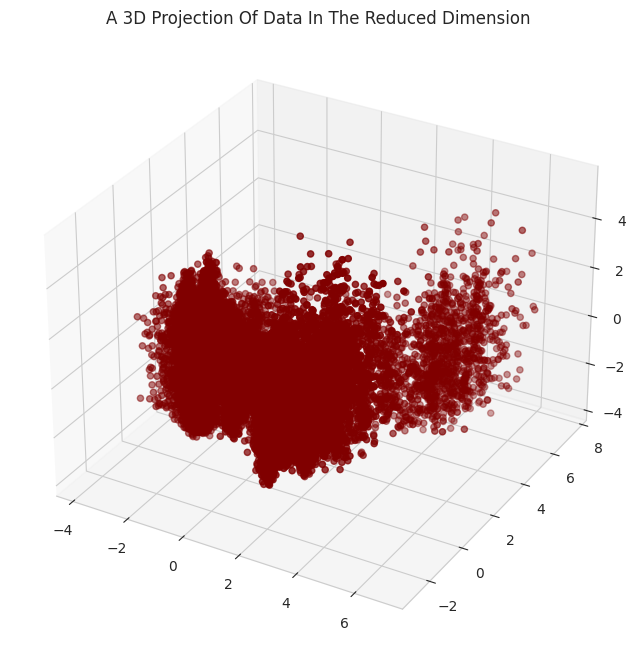

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering.
- Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering
- Examining the clusters formed via scatter plot

The optimal number of Cluster -> 4

Elbow Method to determine the number of clusters to be formed:


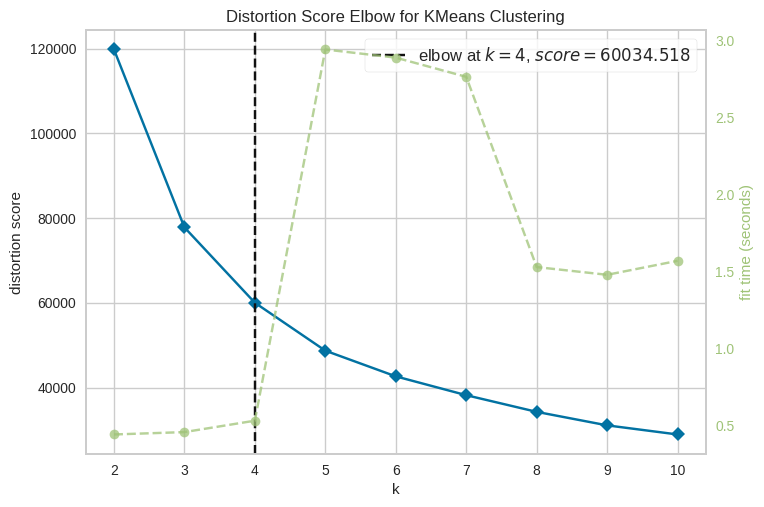

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

##Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

#### Plotting Clusters

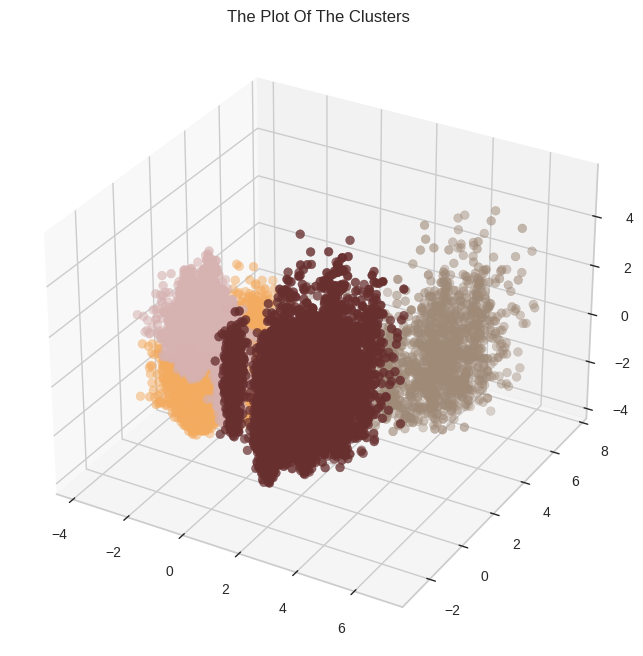

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,count,Clusters
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1


In [ ]:
data[data['Clusters'] == 1]['y'].value_counts()

y
no     11469
yes        6
Name: count, dtype: int64

In [ ]:
data[data['Clusters'] == 2]['y'].value_counts()

y
yes    858
no     460
Name: count, dtype: int64

In [ ]:
data[data['Clusters'] == 3]['y'].value_counts()

y
no     6238
yes     937
Name: count, dtype: int64

In [ ]:
data[data['Clusters'] == 0]['y'].value_counts()

y
no     8453
yes    2057
Name: count, dtype: int64

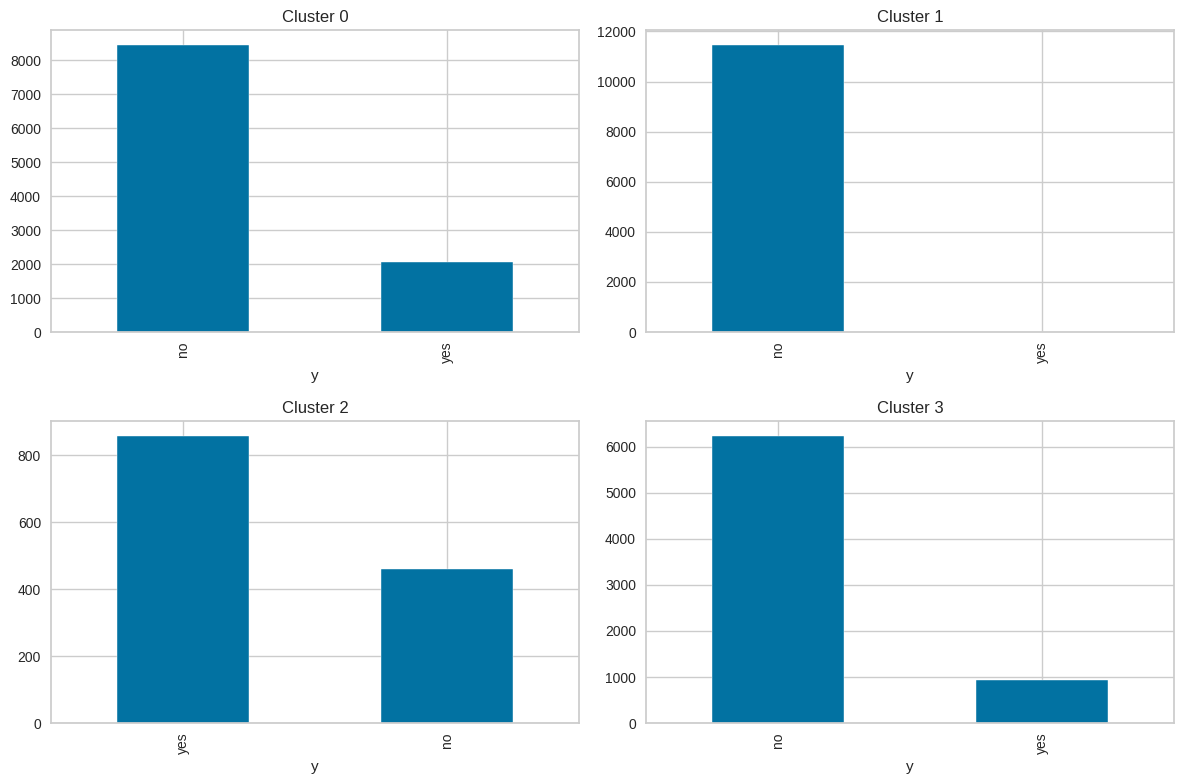

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

data[data['Clusters'] == 0]['y'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Cluster 0')
data[data['Clusters'] == 1]['y'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Cluster 1')
data[data['Clusters'] == 2]['y'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Cluster 2')
data[data['Clusters'] == 3]['y'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Cluster 3')

plt.tight_layout()

plt.show()

- We note that cluter 0 has 2057 Term Deposit Customers
- Cluster 1 has only 6 customer who have Deposit

In [ ]:
def get_top_categories(cluster_number):
    ##Initialize an empty dictionary to store top categories for each feature
    top_categories_dict = {}

    marital_counts = data[data['Clusters'] == cluster_number][data['y'] == 'yes']['marital'].value_counts()
    top_marital_category = marital_counts.idxmax()
    top_categories_dict['marital'] = top_marital_category

    job_counts = data[data['Clusters'] == cluster_number][data['y'] == 'yes']['job'].value_counts()
    top_job_category = job_counts.idxmax()
    top_categories_dict['job'] = top_job_category

    education_counts = data[data['Clusters'] == cluster_number][data['y'] == 'yes']['education'].value_counts()
    top_education_category = education_counts.idxmax()
    top_categories_dict['education'] = top_education_category

    loan_counts = data[data['Clusters'] == cluster_number][data['y'] == 'yes']['loan'].value_counts()
    top_loan_category = loan_counts.idxmax()
    top_categories_dict['loan'] = top_loan_category


    top_duration_value = data[data['Clusters'] == cluster_number][data['y'] == 'yes']['duration'].mode()[0]
    top_categories_dict['duration'] = top_duration_value

    month_counts = data[data['Clusters'] == cluster_number][data['y'] == 'yes']['month'].value_counts()
    top_month_category = month_counts.idxmax()
    top_categories_dict['month'] = top_month_category

    return top_categories_dict

In [ ]:
cluster_number = 0
top_categories = get_top_categories(cluster_number)
print(top_categories)

{'marital': 'married', 'job': 'admin.', 'education': 'university.degree', 'loan': 'no', 'duration': 200, 'month': 'may'}


In [ ]:
cluster_number = 1
top_categories = get_top_categories(cluster_number)
print(top_categories)

{'marital': 'married', 'job': 'blue-collar', 'education': 'high.school', 'loan': 'no', 'duration': 119, 'month': 'jun'}


In [ ]:
cluster_number = 2
top_categories = get_top_categories(cluster_number)
print(top_categories)

{'marital': 'married', 'job': 'admin.', 'education': 'university.degree', 'loan': 'no', 'duration': 182, 'month': 'aug'}


In [ ]:
cluster_number = 3
top_categories = get_top_categories(cluster_number)
print(top_categories)

{'marital': 'married', 'job': 'admin.', 'education': 'university.degree', 'loan': 'no', 'duration': 543, 'month': 'jul'}


From the Cluster 0 we infer
- Marital Status: The majority of customers who subscribed to the term deposit in this cluster are married. This suggests that married individuals might be more inclined to invest in term deposits. Marketing efforts could focus on targeting married couples with tailored messaging that emphasizes the benefits and security of term deposits for family financial planning.

- Occupation: The top job category for subscribers in this cluster is 'admin.'. This indicates that individuals in administrative roles are more likely to invest in term deposits. Marketing strategies could involve targeting professionals in administrative positions through channels such as business networks, industry events, and professional associations.

- Education Level: Customers with a university degree are the most prevalent among term deposit subscribers in this cluster. This suggests that individuals with higher education levels may be more financially literate and inclined to make long-term investments. Marketing campaigns could emphasize the potential for long-term financial growth and stability associated with term deposits, appealing to the aspirations and values of educated individuals.

- Loan Status: The majority of subscribers in this cluster do not have any existing loans. This indicates that individuals who are financially stable and have lower debt burdens are more likely to invest in term deposits. Marketing efforts could target segments of the population with low debt-to-income ratios, offering term deposit products as a means of further financial security and growth.
- Duration: The average duration of contact with customers who subscribed to term deposits in this cluster is 200 seconds. Campaigns should aim to deliver clear and compelling messages about the benefits of term deposits within a short timeframe to capture customers' attention effectively.

- Month: The most common month of contact for subscribers in this cluster is May. This could suggest that marketing efforts during this month are particularly effective for engaging customers who are interested in term deposits. Marketing campaigns could be timed to coincide with periods of increased receptivity, leveraging seasonality and consumer behavior trends.